<a href="https://www.kaggle.com/code/tolgatanrisever/heart-attack-analysis-and-modeling?scriptVersionId=117423908" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Heart Attack Analysis & Prediction<br>
## What will you learn from this project?<br>
* EDA<br>
* Missing Value Analysis<br>
* Categoric and Numeric Features<br>
* Standardization<br>
* Box - Swarm - Cat - Correlation Plot Analysis<br>
* Outlier Detection<br>
* Modelling and Tuning Machine Learning Model<br>
## Introduction<br>
A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood.<br>
The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle.<br>
Coronary artery disease (CAD) is the main cause of heart attack.<br>
<br>

### Analysis Content<br>
1. Python Libraries<br>
2. Data Content<br>
3. Read and Analyse Data<br>
4. Missing Value Analysis<br>
5. Unique Value Analysis<br>
6. Categorical Feature Analysis<br>
7. Numeric Feature Analysis<br>
8. Standardization<br>
9. Box Plot Analysis<br>
10. Swarm Plot Analysis<br>
11. Cat Plot Analysis<br>
12. Correlation Analysis<br>
13. Outlier Detection<br>
14. Modelling<br>
    a. Encoding Categorical Columns<br>
    b. Scaling<br>
    b. Train/Test Split<br>
    d. Logistic Regression<br>
    e. Logistic Regression Hyperparameter Tuning<br>
15. Conclusion<br>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
plt.style.use("seaborn-notebook")
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error, r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


## Data Content<br>
* **Age**: Age of the patient<br>
* **Sex**: Sex of the patient<br>
* **exang**: exercise induced angina (1 = yes; 0 = no)<br>
* **ca**: number of major vessels (0-3)<br>
* **cp**: Chest Pain type chest pain type<br>
     * Value 1: typical angina<br>
     * Value 2: atypical angina<br>
     * Value 3: non-anginal pain<br>
     * Value 4: asymptomatic<br>
* **trtbps**: resting blood pressure (in mm Hg)<br>
* **chol**: cholestoral in mg/dl fetched via BMI sensor<br>
* **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
* **rest_ecg**: resting electrocardiographic <br>
    * Value 0: normal<br>
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
* **thalach**: maximum heart rate achieved<br>
* **target**: 0= less chance of heart attack 1= more chance of heart attack<br>

## Read and Analyse Data¶
In this section, we read heart.csv

In [2]:
train_df=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
train_df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
train_df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [4]:
train_df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Missing Values

In [6]:
# missing value
train_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Unique Value Analysis


In [7]:
for i in list(train_df.columns):
    print("{} -- {}".format(i, train_df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


## Categorical Feature Analysis

In [8]:
#%%categorical var 
def numerical(train_df):
    num_cols = train_df._get_numeric_data().columns
    return num_cols

num_val=numerical(train_df)


In [9]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]

In [10]:
numerical_list=list(set(num_val) - set(categorical_list)) 

In [11]:
print(numerical_list)
print(categorical_list)

['oldpeak', 'trtbps', 'thalachh', 'chol', 'age']
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']


In [12]:
def histogram(variable_x):
    fig = px.histogram(train_df,x=variable_x,marginal='box'
                       ,title=variable_x, width=700, height=500,color_discrete_sequence=['indianred'])
    fig.show()

In [13]:
def hisplot(variable):
    fig = px.histogram(train_df,
                       x=variable,
                       color=variable,
                       title=variable,
                       width=700,
                       height=500,
                       barmode='overlay'
                       )
    fig.update_layout(bargap=0.1,barmode='stack', xaxis={'categoryorder': 'total descending'})
   
    fig.show()

In [14]:
hisplot("cp")

In [15]:
for i in categorical_list:
    hisplot(i)

In [16]:
fig = px.scatter_matrix(train_df, dimensions=['age', 'trtbps', 'thalachh', 'oldpeak', 'chol'], color="age",width=1300, height=1000,)
fig.show()

In [17]:
fig_scatter = px.scatter_matrix(train_df, dimensions=['age', 'trtbps', 'thalachh', 'oldpeak', 'chol'], color="age",width=1300, height=1000,)
fig_bar = px.bar(train_df,y=['age', 'trtbps', 'thalachh', 'oldpeak', 'chol'])
fig_scatter.add_trace(fig_bar.data[1])
fig_scatter.show()

## StandardScaler And Dummies

In [18]:
from sklearn.preprocessing import StandardScaler 
def scaler(train_df:pd.DataFrame):
    sc=StandardScaler()
    train_df=sc.fit_transform(train_df)
    return train_df
def dummies(train_df: pd.DataFrame, columns):
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    train_df[columns] = le.fit_transform(train_df[columns])

    

    train_df = pd.get_dummies(train_df, columns=[columns])
    return train_df


* numerical_list -- scaler
* categorical_list -- dummies

In [19]:
num_df=pd.DataFrame()
for i in numerical_list:
    num_df[i]=train_df[i].copy()
num_df    
    

,oldpeak,trtbps,thalachh,chol,age
0,2.3,145,150,233,63
1,3.5,130,187,250,37
2,1.4,130,172,204,41
3,0.8,120,178,236,56
4,0.6,120,163,354,57
...,...,...,...,...,...
298,0.2,140,123,241,57
299,1.2,110,132,264,45
300,3.4,144,141,193,68
301,1.2,130,115,131,57


In [20]:
cat_df=pd.DataFrame()
for i in categorical_list:
    cat_df[i]=train_df[i].copy()
cat_df    
    

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


In [21]:
cat_df["slp"].value_counts()

2    142
1    140
0     21
Name: slp, dtype: int64

In [22]:
dummies_list=[]
for i in categorical_list:
    a=cat_df[i].value_counts()
    if len(a) > 2:
        dummies_list.append(i)
dummies_list

['cp', 'restecg', 'slp', 'caa', 'thall']

In [23]:
for i in dummies_list:
    cat_df=dummies(cat_df, i)

In [24]:
cat_df

,sex,fbs,exng,output,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,1,1,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,1,0,0,1,0,1,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0,0,1,1,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
299,1,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
300,1,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
301,1,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [25]:

num_df=pd.DataFrame(scaler(num_df))

In [26]:
num_df.columns=numerical_list

In [27]:
num_df

,oldpeak,trtbps,thalachh,chol,age
0,1.087338,0.763956,0.015443,-0.256334,0.952197
1,2.122573,-0.092738,1.633471,0.072199,-1.915313
2,0.310912,-0.092738,0.977514,-0.816773,-1.474158
3,-0.206705,-0.663867,1.239897,-0.198357,0.180175
4,-0.379244,-0.663867,0.583939,2.082050,0.290464
...,...,...,...,...,...
298,-0.724323,0.478391,-1.165281,-0.101730,0.290464
299,0.138373,-1.234996,-0.771706,0.342756,-1.033002
300,2.036303,0.706843,-0.378132,-1.029353,1.503641
301,0.138373,-0.092738,-1.515125,-2.227533,0.290464


In [28]:
cat_df


,sex,fbs,exng,output,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,1,1,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,1,0,0,1,0,1,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0,0,1,1,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
299,1,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
300,1,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
301,1,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [29]:
num_df = pd.concat([num_df, train_df.loc[:, "output"]], axis = 1)
num_df.head()

,oldpeak,trtbps,thalachh,chol,age,output
0,1.087338,0.763956,0.015443,-0.256334,0.952197,1
1,2.122573,-0.092738,1.633471,0.072199,-1.915313,1
2,0.310912,-0.092738,0.977514,-0.816773,-1.474158,1
3,-0.206705,-0.663867,1.239897,-0.198357,0.180175,1
4,-0.379244,-0.663867,0.583939,2.082050,0.290464,1


In [30]:
data_melted = pd.melt(num_df, id_vars = "output", var_name = "features", value_name = "value")
data_melted.head(20)

,output,features,value
0,1,oldpeak,1.087338
1,1,oldpeak,2.122573
2,1,oldpeak,0.310912
3,1,oldpeak,-0.206705
4,1,oldpeak,-0.379244
5,1,oldpeak,-0.551783
6,1,oldpeak,0.224643
7,1,oldpeak,-0.896862
8,1,oldpeak,-0.465514
9,1,oldpeak,0.483451


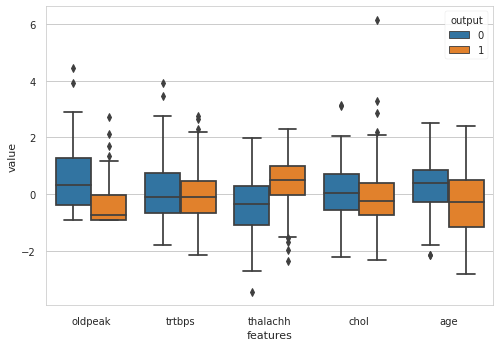

In [31]:
# box plot
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

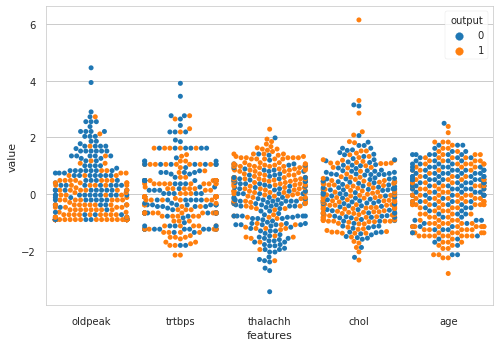

In [32]:
# swarm plot
plt.figure()
sns.swarmplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

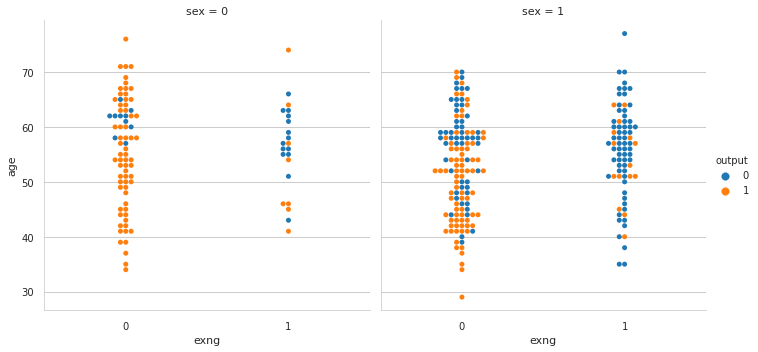

In [33]:
sns.catplot(x = "exng", y = "age", hue = "output", col = "sex", kind = "swarm", data = train_df)
plt.show()

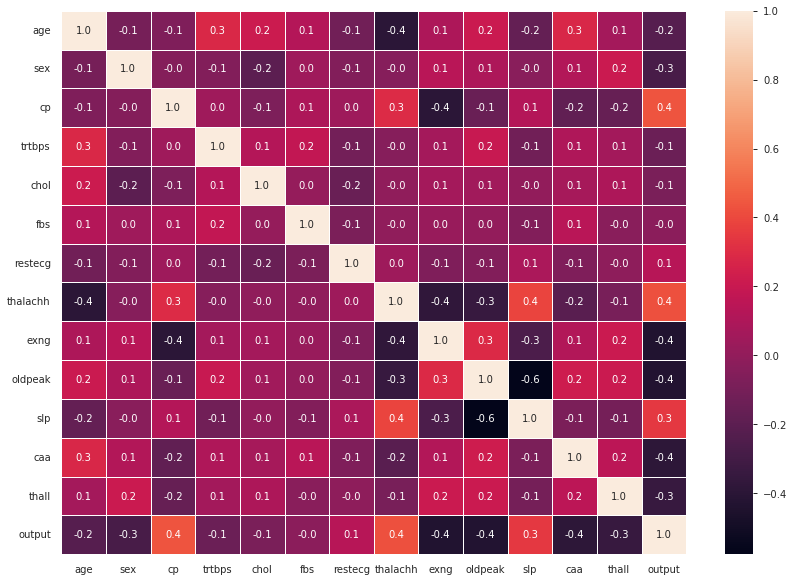

In [34]:
plt.figure(figsize = (14,10))
sns.heatmap(train_df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

Outlier Detection

In [35]:
# outlier detection
def detect_outliers(df,features):
    
    for i in features:

        # IQR
        Q1 = np.percentile(df.loc[:, i],25)
        Q3 = np.percentile(df.loc[:, i],75)

        IQR = Q3 - Q1

        print("Old shape: ", df.loc[:, i].shape)

        # upper bound
        upper = np.where(df.loc[:, i] >= (Q3 +2.5*IQR))

        # lower bound
        lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))

        print("{} -- {}".format(upper, lower))

        try:
            df.drop(upper[0], inplace = True)
        except: print("KeyError: {} not found in axis".format(upper[0]))

        try:
            df.drop(lower[0], inplace = True)
        except:  print("KeyError: {} not found in axis".format(lower[0]))

        print("New shape: ", df.shape)
        
        
    return df



In [36]:
num_df_copy=num_df.copy()

In [37]:
num_df= detect_outliers(num_df,numerical_list)

Old shape:  (303,)
(array([204]),) -- (array([], dtype=int64),)
New shape:  (302, 6)
Old shape:  (302,)
(array([222, 247]),) -- (array([], dtype=int64),)
New shape:  (300, 6)
Old shape:  (300,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 6)
Old shape:  (300,)
(array([85]),) -- (array([], dtype=int64),)
New shape:  (299, 6)
Old shape:  (299,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (299, 6)


In [38]:
num_df.reset_index(inplace = True)


In [39]:
num_df_copy.drop(labels='output',axis=1,inplace=True)

In [40]:
train=pd.concat([num_df_copy,cat_df],axis=1).reset_index(drop = True)

In [41]:
train= detect_outliers(train,numerical_list)

Old shape:  (303,)
(array([204]),) -- (array([], dtype=int64),)
New shape:  (302, 28)
Old shape:  (302,)
(array([222, 247]),) -- (array([], dtype=int64),)
New shape:  (300, 28)
Old shape:  (300,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 28)
Old shape:  (300,)
(array([85]),) -- (array([], dtype=int64),)
New shape:  (299, 28)
Old shape:  (299,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (299, 28)


In [42]:
train.reset_index(inplace=True)

In [43]:
train.columns

Index(['index', 'oldpeak', 'trtbps', 'thalachh', 'chol', 'age', 'sex', 'fbs',
       'exng', 'output', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'slp_0', 'slp_1', 'slp_2', 'caa_0', 'caa_1',
       'caa_2', 'caa_3', 'caa_4', 'thall_0', 'thall_1', 'thall_2', 'thall_3'],
      dtype='object')

In [44]:
train.drop(labels='index',axis=1,inplace=True)

In [45]:
train

,oldpeak,trtbps,thalachh,chol,age,sex,fbs,exng,output,cp_0,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,1.087338,0.763956,0.015443,-0.256334,0.952197,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,2.122573,-0.092738,1.633471,0.072199,-1.915313,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0.310912,-0.092738,0.977514,-0.816773,-1.474158,0,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,-0.206705,-0.663867,1.239897,-0.198357,0.180175,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,-0.379244,-0.663867,0.583939,2.082050,0.290464,0,0,1,1,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,-0.724323,0.478391,-1.165281,-0.101730,0.290464,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
295,0.138373,-1.234996,-0.771706,0.342756,-1.033002,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
296,2.036303,0.706843,-0.378132,-1.029353,1.503641,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
297,0.138373,-0.092738,-1.515125,-2.227533,0.290464,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1


In [46]:
X = train.drop(["output"], axis = 1)
y = train[["output"]]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (209, 27)
X_test: (90, 27)
y_train: (209, 1)
y_test: (90, 1)


In [48]:
def logisticreg(x_train:pd.DataFrame,y_train:pd.DataFrame,x_test:pd.DataFrame,y_test:pd.DataFrame):
    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)
    y_pred=logreg.predict(x_test)
    yhead=pd.Series(y_pred).round(0).abs()
   
    cm=confusion_matrix(y_test, y_pred)
   
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)

    # accuracy
    accuracy_test = logreg.score(x_test, y_test)
    print("Accuracy Test: ", accuracy_test)
    accuracy_train = logreg.score(x_train, y_train)
    print("Accuracy Train: ", accuracy_train)

    # root mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE: ", rmse)

    # mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("MSE: ", mse)

    # mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    print("MAE: ", mae)

    # r2 score
    r2 = r2_score(y_test, y_pred)
    print("R2 Score: ", r2)
    
    return yhead,y_pred

In [49]:
y_head1,y_head=logisticreg(X_train, y_train, X_test, y_test)

Confusion Matrix: 
 [[26  9]
 [ 2 53]]
Accuracy Test:  0.8777777777777778
Accuracy Train:  0.8755980861244019
RMSE:  0.3496029493900505
MSE:  0.12222222222222222
MAE:  0.12222222222222222
R2 Score:  0.48571428571428577


In [50]:
def destreeClass(x_train,y_train,x_test,y_test,criterion:str='gini',splitter:str='best'):
    """
    criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
    splitter{“best”, “random”}, default=”best”
    """
    drc=DecisionTreeClassifier(criterion=criterion,splitter=splitter)    
    drc.fit(x_train,y_train)
    y_pred=drc.predict(x_test)#tahmin ediyoruz   
    y_head=pd.Series(y_pred).round(0).abs()
      
    cm=confusion_matrix(y_test, y_pred)
   
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)

    # accuracy
    accuracy_test = drc.score(x_test, y_test)
    print("Accuracy Test: ", accuracy_test)
    accuracy_train = drc.score(x_train, y_train)
    print("Accuracy Train: ", accuracy_train)

    # root mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE: ", rmse)

    # mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print("MSE: ", mse)

    # mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    print("MAE: ", mae)

    # r2 score
    r2 = r2_score(y_test, y_pred)
    print("R2 Score: ", r2)

    enter="y"
    #enter=str(input("   Enter 'y' for the Decision Tree tree image: "))
    if enter=='y'or enter=='Y':
        fn=list(map(str,x_test.columns))
        cn=list(map(str,y_test.output))
        fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
        tree.plot_tree(drc,
                        feature_names = fn, 
                        class_names=cn,
                        filled = True);
        #fig.savefig('dtc_image.png') 
    else: 
        None
    return y_pred,y_head  

Confusion Matrix: 
 [[25 10]
 [16 39]]
Accuracy Test:  0.7111111111111111
Accuracy Train:  1.0
RMSE:  0.5374838498865699
MSE:  0.28888888888888886
MAE:  0.28888888888888886
R2 Score:  -0.21558441558441555


(array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
        1, 1]),
 0     1
 1     0
 2     0
 3     0
 4     1
      ..
 85    0
 86    1
 87    0
 88    1
 89    1
 Length: 90, dtype: int64)

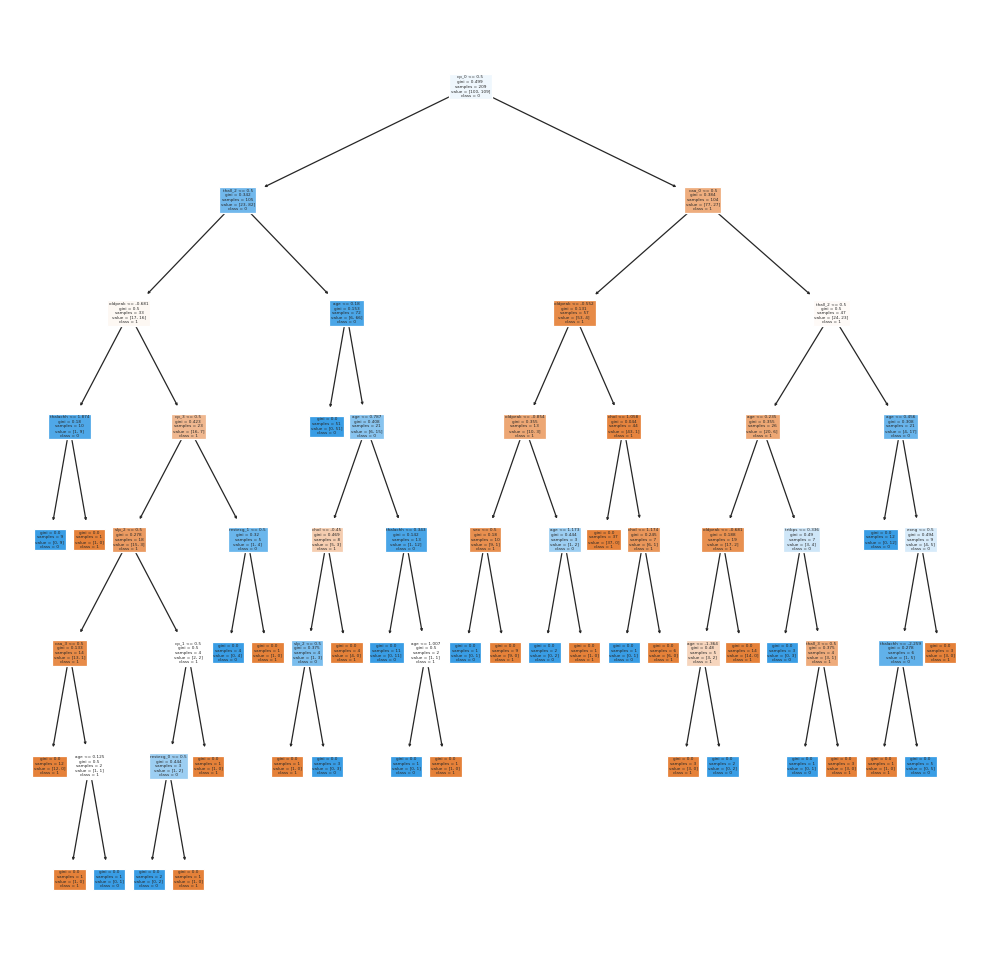

In [51]:
destreeClass(X_train,y_train,X_test,y_test,criterion='gini',splitter='best')